# 2015 Canadian Election Twitter Sentiment Analysis

IMPORTING THE LIBRARIES

In [2]:
import pandas as pd #For reading the datasets
import matplotlib.pyplot as plt # For plotting the data
import numpy as np # For Mathematical functions

IMPORTING THE DATASETS - CLASSIFIED TWEETS AND UNCLASSIFIED TWEETS

In [195]:
# READING THE DATASETS AND PRINTING THEIR COLUMNS

df1 = pd.read_csv('classified_tweets.txt', ',')
df1[0:10]
print(df1[0:10])

   class          id                          date     query             user  \
0  0      1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0      1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton     
2  0      1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY  mattycus          
3  0      1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY  ElleCTF           
4  0      1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY  Karoli            
5  0      1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY  joy_wolf          
6  0      1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY  mybirch           
7  0      1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY  coZZ              
8  0      1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY  2Hood4Hollywood   
9  0      1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY  mimismo           

                                                                                                            

In [196]:
# EXTRACTING TWO COLUMNS TO A NEW DATAFRAME

df2 = df1.loc[:, ['class', 'text']] 
df2[0:10]
#print(df2[0:10])
df2.columns
#print(df2.columns)

Index(['class', 'text'], dtype='object')

In [5]:
# Assigning the column names for the unclassified tweets

df4 = pd.read_csv('unclassified_tweets.txt', '\t\n', names = ['class', 'text'])
df4['text'] = df4['class']
for i in range (0,3078):
    df4['class'][i] = ' '
df4.columns = ['class', 'text']

C:\Users\manig\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
# Appending both classified dataset and unclassified dataset TO CREATE A SINGULAR BAG OF WORDS MODEL

df5 = df2.append(df4, ignore_index = True)

DATA CLEANING- CAUTIOUSLY REMOVED THE STOPWORDS BY ELIMINATING SOME WORDS THAT ACTUALLY DEFINES THE SENTIMENT

In [8]:
# Data Cleansing

# Using Regular Expressions to clean the URLs, Spaces, special characters
# Importing nltk and its sub function corpus for using the STOPWORDS
# Importing the Stemming tool to convert all the words to their actual root word

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
tweets = [] # empty list for collection of cleansed tweets
for i in range (0,203078):
    tweet = re.sub(r'[^http]?[a-z]*[:.]+\S+', " ", df5['text'][i]) #removing all the URL's
    tweet = re.sub('[^a-zA-Z]', ' ', tweet) # Removing the special characters apart from alphabets
    tweet = tweet.lower() #converting the tweets to the lower case
    tweet = tweet.split() # splitting the words as elements of list to compare with the stop words
    stop = []
    stop = stopwords.words('english')
    #essentials are the set of words which provides value to the tweets. Hence they are removed from stopwords
    essentials = ['no','against','nor',"don't",'not',"aren't","hasn't","didn't","couldn't","doesn't","hadn't","haven't","isn't","wouldn't","won't","weren't","wasn't","shouldn't","shan't","needn't","mustn't","mightn't", 'out', 'over', 'under']
    for word in list(stop):
        if word in essentials:
            stop.remove(word)
    ps = PorterStemmer() #Stemming of the words to convert them to common root word
    tweet1 = [ps.stem(word) for word in tweet if not word in stop]
    tweet1 = ' '.join(tweet1)
    tweets.append(tweet1) # appending all the cleansed tweets to the main tweets set

In [10]:
# printing the last tweet to compare with the data

print (tweets[203077])
print (tweets [-1:])

prime exampl liber intel
['prime exampl liber intel']


In [18]:
# Splitting the first 200,000 tweets as classified and rest as the unclassified

classified_list = tweets[0:200000]
unclassified_list = tweets [200000:203078]
print(unclassified_list[0])

live dream cameraman camera cameracept camera camera marriott feet tommulcair


CREATING THE BAG OF WORDS MODEL FOR BOTH CLASSIFIED TWEETS AND UNCLASSIFIED TWEETS TO HAVE Good Prediction

In [12]:
# Creating a single bag of words model for both the classified and unclassified tweets for better prediction

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 3000)
X = cv.fit_transform(tweets).toarray()

#sparse bag of words matrix for the classified tweets
X1 = X [0:200000] 

#sparse bag of words matrix for the unclassified tweets
X2 = X [200000:203078] 

y1 = df2.iloc[:, 0].values #dependent variable for the classified tweets

SPLITTING THE DATASET FOR TRAINING AND TESTING WITH THE PROPOSED TEST SIZE OF 30%

In [13]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

C:\Users\manig\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


FITTING THE LOGISTIC REGRESSION MODEL INTO THE TRAINING SET

In [14]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

PREDICTING THE TEST SET BASED ON THE TRAINING SET

In [15]:
# Predicting the Test set results

y1_pred = classifier.predict(X1_test)

DISPLAY OF THE CONFUSION MATRIX AND THE ACCURACY SCORE OF THE MODEL OVER SAMPLES OF CLASSIFIED DATASET

In [16]:
# Making the Confusion Matrix for the classified data

from sklearn.metrics import confusion_matrix, accuracy_score
cm_logistic = confusion_matrix(y1_test, y1_pred)

print(cm_logistic)
print('\nThe accuracy score is :', accuracy_score(y1_test, y1_pred)*100)

[[22035  7812]
 [ 6416 23737]]

The accuracy score is : 76.2866666667


PREDICTION OF SENTIMENT FOR UNCLASSIFIED TWEETS USING LOGISTIC REGRESSION

In [17]:
# Since X2 is the dependant variable and we dont know the sentiments, whole X2 is used for prediction instead of X_train

y_pred = classifier.predict(X2)
L1= np.array(y_pred)

#display of the positive sentiments and negative sentiments of the unclassified dataset

positive_sentiment = list(L1).count(4)
print ('The no.of positive tweets are:\t', positive_sentiment)
negative_sentiment = list(L1).count(0)
print ('The no.of negative tweets are:\t', negative_sentiment)

#creating a new dataframe with corresponding sentiments and tweets of the unclassified set
L1 = L1.tolist()
df6= pd.DataFrame({'sentiment': unclassified_list})
df6 = pd.DataFrame({'sentiment': L1})
df6['text'] = unclassified_list

The no.of positive tweets are:	 2265
The no.of negative tweets are:	 813


# EXPLORATORY ANALYSIS FOR UNCLASSIFIED TWEETS

In [93]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [94]:
# Recalling the cleansed dataset of unclassified tweets

unclassified_list[0:5]

unclassified_tweets = []
for i in range (0,3078):
    text = unclassified_list[i].split()
    unclassified_tweets.append(text)

unclassified_tweets[0]

['live',
 'dream',
 'cameraman',
 'camera',
 'cameracept',
 'camera',
 'camera',
 'marriott',
 'feet',
 'tommulcair']

In [96]:
# Extraction of the most frequent words from the tweets

#Creating List of Liberal, NDP, Conservative, and Green  Keywords

Liberal = []
NDP = []
Conservative = []
Green = []
Political_parties = ["Liberal", "NDP", "Conservative", "Green"]

#Using patterns to find possible keywords pertaining to 
#each political parties from the tweets

#for i in range(0, 50):
for word in unclassified_list:
        Temp1 = re.findall(r'[a-z]*(?:trud|lpc|liberal|justi|realc|jt)[a-z]*', word)
        Liberal.extend(Temp1)
        Temp2 = re.findall(r'[a-z]*(?:ndp|tom|thom|mulc|cair|npd|^tm$|ready4|partyof)[a-z]*', word)
        NDP.extend(Temp2)
        Temp3 = re.findall(r'[a-z]*(?:cpc|torry|torie|harp|steph|conservative|conparty)[a-z]*', word)
        Conservative.extend(Temp3)
        Temp4 = re.findall(r'[a-z]*(?:^may|^emmay|green|gpc|eliza)[a-z]*', word)
        Green.extend(Temp4)
        
#Removing duplications

Liberal = list(set(Liberal))
NDP = list(set(NDP))
Conservative = list(set(Conservative))
Green = list(set(Green))

#Dataframe of keywords

Keywords = [Liberal, NDP, Conservative, Green]
keywords_df = pd.DataFrame({'Keywords': Keywords}, index = Political_parties) 
pd.set_option('display.max_colwidth', -1)
keywords_df.head()

,Keywords
Liberal,"[lpc, johnmccallumlpc, ecojustic, jterri, justinoverhishead, liberalparti, justic, trudeauforpm, liberalvsconservativefamili, liberalcanuck, isupporttrudeau, nolpc, liberalsarehypocrit, justintrudeau, unjustifi, trudeaulit, nototrudeau, realchang, trudeaumania, realchangenow, realchanger, jt, publicjustic, justintrdeau, justin, quipetrudeau, votetrudeau, generationtrudeau, justintim, teamtrudeau, liberalnew, liberallog, trudeau]"
NDP,"[powerandpolit, stomp, tommi, gotom, robertndp, ndpleader, ndproot, stomach, usedtobendp, tomorrow, tomasso, valckendp, uncletommi, optom, mulcair, tom, nondp, votendp, bottom, thompson, alanthomasdoyl, endprohibit, futurendpchief, ndpcanada, peggynashndp, ndpwillchangethat, tommunistmanifesto, richmondhillndp, cndpoli, dictatortom, tommulcair, thomasmulcair, ndpapc, ndpwillruincanada, ivotedndp, ndpli, thomjani, notlaytonsndp, npd, tommulcairforpm, tsectom, cairo, tommulcairplq, ontariondp, hulkmulcair, phantom, ndp, thoma]"
Conservative,"[harperautosquar, sleazystephen, voteharp, jadeharp, harpercc, conservativefail, harpercon, cpcgailshea, pmharper, harperit, stephan, harpiavelli, stevenharp, harpernomor, premierministreharp, heaveharp, liberalvsconservativefamili, stopharp, harper, voteharperout, mharp, stephenlauten, istandwithharp, fuckharp, laureenharp, cpc, stopharperswar, sharpestick, harperhistori, cpcjesu, cpccreateddebt, byeharp, sharp, anyonebutharp, nomoreharp, dumpharp, stephen, votecpc, harpersuck, stephenharp, harpoon, harpersbrain, shitharperdid, againstharp, harperman, dictatorharp, harpersrecord, sharper]"
Green,"[greenpeac, elizabethmay, elizabeth, greenparti, evergreen, elizabethkerr, votegreen, sgigreen, greensurg, gpc, mayb, wildrosegreen, green, greensofnorthisland, emmay, canadiangreen, mayle, greenadamp, may]"


In [97]:
liberal_party = Liberal
conservative_party = Conservative
New_Democratic_party = NDP
Green_Party_of_canada = Green

In [98]:
# Counting the number of tweets that contained about each parties

no_of_tweets_on_liberal_party = 0
no_of_tweets_on_conservative = 0
no_of_tweets_on_ndp = 0
no_of_tweets_on_green_party = 0

for i in range (0,3078):
    for word in unclassified_tweets[i]:
        if word in liberal_party:
            no_of_tweets_on_liberal_party+=1
            break

for i in range (0,3078):
    for word in unclassified_tweets[i]:
        if word in conservative_party:
            no_of_tweets_on_conservative+=1
            break

for i in range (0,3078):
    for word in unclassified_tweets[i]:
        if word in New_Democratic_party:
            no_of_tweets_on_ndp+=1
            break
        
for i in range (0,3078):
    for word in unclassified_tweets[i]:
        if word in Green_Party_of_canada:
            no_of_tweets_on_green_party+=1
            break
            
print ('The no.of tweets about Liberal Party of Canada was: \t\t', no_of_tweets_on_liberal_party)

print ('The no.of tweets about Conservative Party of Canada was: \t', no_of_tweets_on_conservative)

print ('The no.of tweets about New Democratic Party of Canada was: \t', no_of_tweets_on_ndp)

print ('The no.of tweets about Green Party of Canada was: \t\t', no_of_tweets_on_green_party)

The no.of tweets about Liberal Party of Canada was: 		 678
The no.of tweets about Conservative Party of Canada was: 	 626
The no.of tweets about New Democratic Party of Canada was: 	 552
The no.of tweets about Green Party of Canada was: 		 77


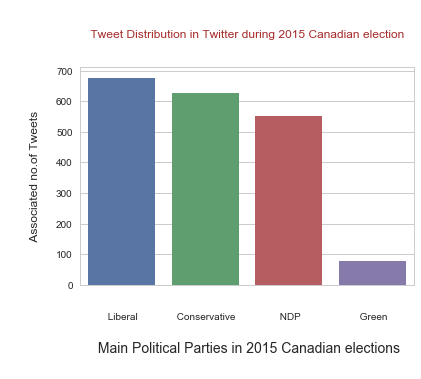

In [99]:
import seaborn as sns

#Bar chart showing comparison tweets corresponding to the respective political parties 

label=['\n\n Liberal',' \n\n Conservative','  \n\n NDP', '\n\n Green']
Number_tweets=[no_of_tweets_on_liberal_party,no_of_tweets_on_conservative,no_of_tweets_on_ndp,no_of_tweets_on_green_party]
# Plotting Style
sns.set(style="whitegrid", color_codes=True)

# Barplot of the Political Parties 

sns.barplot(x = label, y = Number_tweets )

#Axes Labelling

plt.xlabel('\n Main Political Parties in 2015 Canadian elections\n', fontsize=14)
plt.ylabel('\n\n Associated no.of Tweets \n', fontsize=12)
plt.title('\n\n Tweet Distribution in Twitter during 2015 Canadian election \n\n', color='Brown')

#Display Plot

plt.show() #To display plot

In [171]:
data = pd.read_csv('unclassified_tweets.txt', '\t|\n', names = ['Tweets', 'Hashtag_words', 'Election_words', 'Sentiment Value'], engine= 'python')

data.head(5)

data[-1:]

,Tweets,Hashtag_words,Election_words,Sentiment Value
3077,prime example of #liberal intel,NaN,NaN,NaN


In [173]:
election_words = ['timeforchange','realchange','ready4change', 'readyforchange','trudeau', 'gpc','muclair', 'tommulcair', 'mulcair','harper', 'npd', 'ndp','thomasmulcair','thomasmuclair', 'conservative', 'liberal', 'mulclair', 'justintrudeau', 'teamtrudeau', 'tommuclair', 'tommuclairpq', 'liberals', 'harperman', 'dictatorharper', 'tm', 'elizabethmay', 'stephenharper', 'lpc', 'stopharper', 'premierministerharper' , 'cpc', 'stevenharper', 'lib' ]

liberal_party = ['realchange', 'trudeau', 'liberal', 'justintrudeau', 'teamtrudeau', 'liberals', 'lpc', 'lib' ]

conservative_party = ['harper', 'conservative', 'harperman', 'dictatorharper', 'stephenharper', 'stopharper', 'premierministerharper' , 'cpc', 'stevenharper']

New_Democratic_party = ['timeforchange','ready4change','muclair', 'tommulcair', 'mulcair', 'npd', 'ndp','thomasmulcair','thomasmuclair', 'mulclair', 'tommuclair', 'tommuclairpq', 'tm']

Green_Party_of_canada = ['gpc', 'elizabethmay']

all_hashtags = []
for i in range (0,3078):
    tweet = re.sub('[^a-zA-Z#]', ' ', data['Tweets'][i])
    tweet = tweet.lower()
    hashtag = re.findall(r"#(\w+)", tweet)
    all_hashtags.append(hashtag)

list_matches = []  
for i in range (0,3078):
    a = all_hashtags[i]
    b = election_words
    set_matches = set(a).intersection(b)
    list_match = list(set_matches)
    list_matches.append(list_match)

data['Hashtag_words'] = all_hashtags

data['Election_words'] = list_matches

sentiments = y_pred.tolist()

data['Sentiment Value'] = sentiments

positive_tweets_on_liberal_party = 0
negative_tweets_on_liberal_party = 0
positive_tweets_on_conservative = 0
negative_tweets_on_conservative = 0
positive_tweets_on_ndp = 0
negative_tweets_on_ndp = 0
positive_tweets_on_green_party = 0
negative_tweets_on_green_party = 0

for i in range (0,3078):
    for word in data['Hashtag_words'][i]:
        if word in liberal_party:
            if data['Sentiment Value'][i]==4:
                positive_tweets_on_liberal_party+=1
            else:
                negative_tweets_on_liberal_party+=1

for i in range (0,3078):
    for word in data['Hashtag_words'][i]:
        if word in conservative_party:
            if data['Sentiment Value'][i]==4:
                positive_tweets_on_conservative+=1
            else:
                negative_tweets_on_conservative+=1


for i in range (0,3078):
    for word in data['Hashtag_words'][i]:
        if word in New_Democratic_party:
            if data['Sentiment Value'][i]==4:
                positive_tweets_on_ndp+=1
            else:
                negative_tweets_on_ndp+=1

for i in range (0,3078):
    for word in data['Hashtag_words'][i]:
        if word in Green_Party_of_canada:
            if data['Sentiment Value'][i]==4:
                positive_tweets_on_green_party+=1
            else:
                negative_tweets_on_green_party+=1

print ('+ve tweets on Liberals:\t\t\t', positive_tweets_on_liberal_party)
print ('-ve tweets on Liberals:\t\t\t', negative_tweets_on_liberal_party)
print ('+ve tweets on Conservatives:\t\t', positive_tweets_on_conservative)
print ('-ve tweets on Conservatives:\t\t', negative_tweets_on_conservative)
print ('+ve tweets on New Democratic Party:\t', positive_tweets_on_ndp)
print ('-ve tweets on New Democratic Party:\t', negative_tweets_on_ndp)
print ('+ve tweets on Green Party:\t\t', positive_tweets_on_green_party)
print ('-ve tweets on Green Party:\t\t', negative_tweets_on_green_party)

+ve tweets on Liberals:			 582
-ve tweets on Liberals:			 221
+ve tweets on Conservatives:		 264
-ve tweets on Conservatives:		 283
+ve tweets on New Democratic Party:	 371
-ve tweets on New Democratic Party:	 190
+ve tweets on Green Party:		 19
-ve tweets on Green Party:		 8


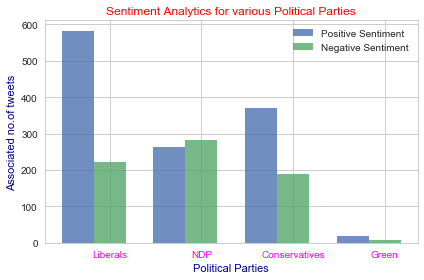

In [198]:
n_groups = 4
means_frank = (positive_tweets_on_liberal_party, positive_tweets_on_conservative, 
               positive_tweets_on_ndp, positive_tweets_on_green_party)
means_guido = (negative_tweets_on_liberal_party, negative_tweets_on_conservative,
               negative_tweets_on_ndp, negative_tweets_on_green_party)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Positive Sentiment')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Negative Sentiment')
 
plt.xlabel('Political Parties', color='darkblue')
plt.ylabel('Associated no.of tweets', color='darkblue')
plt.title('Sentiment Analytics for various Political Parties', color='red')
plt.xticks(index + bar_width, ('Liberals', 'NDP', 'Conservatives', 'Green'), color='magenta')
plt.legend()
 
plt.tight_layout()
plt.show()

# EXPLORATORY ANALYSIS OF CLASSIFIED TWEETS

In [119]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [120]:
# Recalling the cleansed dataset of unclassified tweets

classified_list[0:5]

classified_tweets = []
for i in range (0,200000):
    text = classified_list[i].split()
    classified_tweets.append(text)

classified_tweets[0]

['switchfoot',
 'awww',
 'bummer',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day']

In [121]:
# Extraction of the most frequent words from the tweets

#Creating List of Liberal, NDP, Conservative, and Green  Keywords

Liberal1 = []
NDP1 = []
Conservative1 = []
Green1 = []
Political_parties1 = ["Liberal", "NDP", "Conservative", "Green"]

#Using patterns to find possible keywords pertaining to 
#each political parties from the tweets

#for i in range(0, 50):
for word in classified_list:
        Temp1 = re.findall(r'[a-z]*(?:trud|lpc|liberal|justi|realc|jt)[a-z]*', word)
        Liberal1.extend(Temp1)
        Temp2 = re.findall(r'[a-z]*(?:ndp|tom|thom|mulc|cair|npd|^tm$|ready4|partyof)[a-z]*', word)
        NDP1.extend(Temp2)
        Temp3 = re.findall(r'[a-z]*(?:cpc|torry|torie|harp|steph|conservative|conparty)[a-z]*', word)
        Conservative1.extend(Temp3)
        Temp4 = re.findall(r'[a-z]*(?:^may|^emmay|green|gpc|eliza)[a-z]*', word)
        Green1.extend(Temp4)
        
#Removing duplications

Liberal1 = list(set(Liberal))
NDP1 = list(set(NDP))
Conservative1 = list(set(Conservative))
Green1 = list(set(Green))

#Dataframe of keywords

Keywords1 = [Liberal1, NDP1, Conservative1, Green1]
keywords_df1 = pd.DataFrame({'Keywords': Keywords1}, index = Political_parties1) 
pd.set_option('display.max_colwidth', -1)
keywords_df1.head()

,Keywords
Liberal,"[pjthadj, njthedj, dylanjthoma, jtwee, thejustink, therealcolbi, jtek, jtrumpio, liberalview, djt, justifi, jtimberlak, vicjustic, cjthewrit, djtopaz, liberalsarehypocrit, justinbratton, justincruzkhon, realchang, tjthecool, trudeaumania, djtrentino, intrud, jtv, justinlilli, justinzero, justinkey, jtervin, crystaljtorr, justinlathrop, jtrey, mojustic, justinvinc, jtshea, justinhidalgo, yoursojt, protrud, tjtrapp, trudg, trudeau, bigjtlad, johnmccallumlpc, justinabrook, jtorchyaaa, jtspur, jtitam, mjtam, justineezi, gertrud, jthorp, jtjdt, therealcabbi, therealcrookedi, ojthekid, justinmgaston, liberalparti, justinchronicl, justinhayward, nolpc, justinevil, justingbyrn, injustic, mxjustinbond, justingr, justinpollard, ericjtdf, justinforrest, liberalmormon, jthomsonx, jtferrer, justinberri, jtownend, smartpunkjustin, jtweeti, trudyc, jtotheho, justi, justintrdeau, gertrudesteinjr, justin, djteck, sabrinajt, jtryon, jtoth, justinlevi, therealchrisd, justinschenck, justinpeas, justinmoorhous, jtg, realcycl, justintim, teamtrudeau, jta, jtf, justincavazo, justincislo, ojt, justinrob, jthmpsn, ...]"
NDP,"[dylanjthoma, cairok, robertndp, tomrow, momtomadi, andpoo, anatom, mulcair, tomb, mastomson, thomson, tomatonoob, bottombab, meathumandp, chaseathompson, thomaskattu, thisisrobthoma, thebottomlin, tommydonbavand, tomorrowm, tombston, tomokeef, islandprincess, soggybottom, tomcfli, tompkin, automationatacost, martintom, sammiethomson, thomastorr, photomarathon, adamtthompson, androidtomato, pinkandpolkadot, tomothi, tomalgebra, thomshous, thomasshap, automobil, thethom, tomisgeek, thomasros, tommyyyy, tomlandersuk, thomsing, tomarow, tomvb, cndpoli, tommorrow, vonthompson, thethoma, tomkiss, tomorrownit, tomippen, custompc, rthom, tonetom, larsthomsen, uptomyhip, fantom, tomalderman, tommoro, otomatisasi, accustom, atomicn, salandpepp, potom, tomcat, irethoma, conturytomorrow, tomozo, tommystarl, stayathomemom, tomesimpson, grandpaw, handpos, tomatosalsa, tomnroow, thompey, tomnaden, aatom, tomorrrrow, danniphantom, uandpet, daddytom, tomselleck, marcthom, atomictori, photomedia, tommarrow, angiesweethom, erinthoma, tomei, customat, tomgreenl, dueltommycha, stomp, stompernet, thomaserb, tommorwoww, ...]"
Conservative,"[stephenvil, stephaneeey, stephengilm, stephlest, voteharp, stephencoop, harpercc, conservativefail, stephanielynn, stephenson, stephenhahn, sharpeshot, harperit, stephenrock, stephendanc, mrstephen, stephaniemathew, stephenmullen, itextsharp, heaveharp, premierministreharp, sharpish, harpernomor, sharpi, stephenstohn, stephberg, stephlindsey, stephzillanj, stopharp, stephgracetan, stephenlauten, stephanderson, bsharp, sharpest, stephaniegouw, stephdadi, stephenwolf, stephiem, stephaniew, geekysteph, stephcyru, stephensurefir, huwstephen, adreamforsteph, gstephanopoulo, stephyc, stephsav, sharpiesusan, stephen, stephenhartley, stephersg, hanastephenson, harpersuck, harpersbrain, ashharp, stephaniek, harperlaw, stephaniiee, jhillstephen, stephiedemaria, stepheneyr, stephaniepratt, sarahlsharp, stephdau, csharp, harpersimon, stephanyjbluv, stephanielum, maxharp, stephcrumbley, iamstephluvah, stephneri, stephhi, harpercon, lolstephi, stephvaz, stephiejain, pmharper, stephendon, stepheezi, itsstephenhank, stepheniemey, stephaniesar, stephangey, getsharp, stephikroc, stephweb, carlastephani, stephenagraham, mikharp, stepho, amystephen, stephda, stephykim, stephissurr, voteharperout, mharp, harpersglob, laureenharp, stephintoronto, ...]"
Green,"[mayonais, mayawati, elizadolittl, greengirlblink, greenfalcon, elizareid, mayankgarg, mayakibbl, mattpuppygreen, maykat, stugreenham, elizabethjoan, greenbelt, darrengreen, realjohngreen, mayskywalk, briangreen, mysgreen, greenalley, greenwizard, mayfield, maya, bluegreendragon, jasmynelizabeth, greenhs, jelizabeth, elizabeth, greenhous, greenpeac, greener, favecolorgreen, elizabethashle, markgreenaway, evergreen, maybellin, mayerreich, greentabl, mayf, bennygree

In [122]:
liberal_party1 = Liberal1
conservative_party1 = Conservative1
New_Democratic_party1 = NDP1
Green_Party_of_canada1 = Green1
print(i)

199999


In [123]:
# Counting the number of tweets that contained about each parties

no_of_tweets_on_liberal_party1 = 0
no_of_tweets_on_conservative1 = 0
no_of_tweets_on_ndp1 = 0
no_of_tweets_on_green_party1 = 0

for i in range (0,200000):
    for word in classified_tweets[i]:
        if word in liberal_party1:
            no_of_tweets_on_liberal_party1+=1
            break

for i in range (0,200000):
    for word in classified_tweets[i]:
        if word in conservative_party1:
            no_of_tweets_on_conservative1+=1
            break

for i in range (0,200000):
    for word in classified_tweets[i]:
        if word in New_Democratic_party1:
            no_of_tweets_on_ndp1+=1
            break
        
for i in range (0,200000):
    for word in classified_tweets[i]:
        if word in Green_Party_of_canada1:
            no_of_tweets_on_green_party1+=1
            break
            
print ('The no.of tweets about Liberal Party of Canada was: \t\t', no_of_tweets_on_liberal_party1)

print ('The no.of tweets about Conservative Party of Canada was: \t', no_of_tweets_on_conservative1)

print ('The no.of tweets about New Democratic Party of Canada was: \t', no_of_tweets_on_ndp1)

print ('The no.of tweets about Green Party of Canada was: \t\t', no_of_tweets_on_green_party1)

The no.of tweets about Liberal Party of Canada was: 		 443
The no.of tweets about Conservative Party of Canada was: 	 627
The no.of tweets about New Democratic Party of Canada was: 	 6751
The no.of tweets about Green Party of Canada was: 		 3477


# WORDCLOUD FOR UNCLASSIFED TWEETS

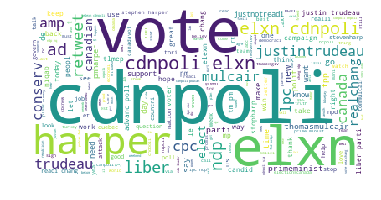

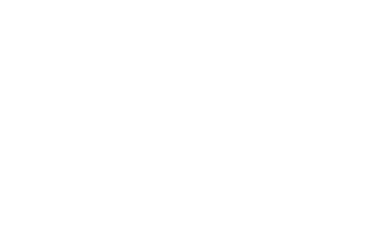

In [155]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

xyz = unclassified_list
letter =' '.join(map(str, xyz))


# Read the whole text.

text= letter
stopwords = set(STOPWORDS)

# generate word cloud

wc = WordCloud(background_color="white", max_words=1000, prefer_horizontal=0.5, stopwords=stopwords)
wc.generate(text)

# show

plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

# WORDCLOUD FOR CLASSIFIED TWEETS

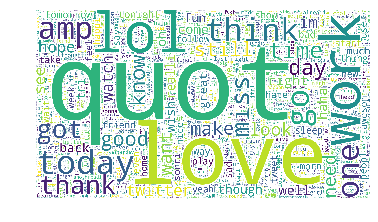

In [167]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

abc = classified_list
word =' '.join(map(str, abc))


# Read the whole text.

text= word
stopwords = set(STOPWORDS)

# generate word cloud

wc1 = WordCloud(background_color="white", max_words=2500, prefer_horizontal=0.5, stopwords=stopwords, width=1920, height=1080)
wc1.generate(text)

# show

plt.imshow(wc1)
plt.axis("off")
plt.figure()
#plt.axis("off")
#plt.show()

# DISCUSSION

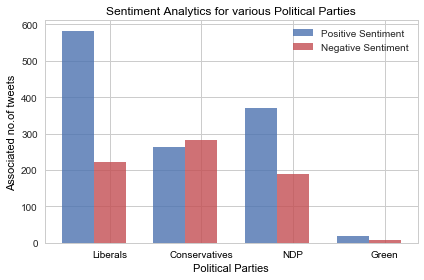

In [199]:
n_groups = 4
means_frank = (positive_tweets_on_liberal_party, positive_tweets_on_conservative, 
               positive_tweets_on_ndp, positive_tweets_on_green_party)
means_guido = (negative_tweets_on_liberal_party, negative_tweets_on_conservative,
               negative_tweets_on_ndp, negative_tweets_on_green_party)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Positive Sentiment')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Negative Sentiment')
 
plt.xlabel('Political Parties', color='black')
plt.ylabel('Associated no.of tweets', color='black')
plt.title('Sentiment Analytics for various Political Parties', color='black')
plt.xticks(index + bar_width, ('Liberals', 'Conservatives', 'NDP', 'Green'), color='black')
plt.legend()
 
plt.tight_layout()
plt.show()

MAIN INFERENCE: 

From the above graph, we can clearly see that LIBERAL PARTY OF CANADA (LPC) headed by JUSTIN TRUDEAU had the HIGHEST POSITIVE SUPPORT from the people. 

Also, comparing to the other two major parties (NDP and Conservatives), LPC had lower number of negative sentiments. 

Therefore, we can easily predict that 2015 Canadian elections will be won by Liberal Party of Canada, LPC and Justin Trudeau will become the Prime Minister of Canada as per the model.

He will defeat the present Prime Minister Stephen Harper who is the leader of Conservative Party of Canada

SUPPORTIVE INFERENCES: 

Also, the second highest party with people support will be 'CONSERVATIVE PARTY OF CANADA (CPC)' headed by STEPHEN HARPER

and third highest party is the 'NATIONAL DEMOCRATIC PARTY (NDP)' under the leadership of Tom Mulcair. 


# RANDOM FOREST CLASSIFICATION- BONUS PART OF THE ASSIGNMENT

In [190]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

# Fitting Random Forest Classification to the Training set

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [191]:
# Predicting the Test set results
y1_pred = forest.predict(X1_test)
yyy_pred = forest.predict(X2)
L3 = np.array(yyy_pred)
positive_sentiment = list(L3).count(4)
print ('The no.of positive tweets are:\t', positive_sentiment)
negative_sentiment = list(L3).count(0)
print ('The no.of negative tweets are:\t', negative_sentiment)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_random = confusion_matrix(y1_test, y1_pred)
print (cm_random)
print('\nThe accuracy score is :', accuracy_score(y1_test, y1_pred)*100)

The no.of positive tweets are:	 2242
The no.of negative tweets are:	 836
[[22611  7236]
 [ 8563 21590]]

The accuracy score is : 73.6683333333


# BONUS PART OF THE ASSIGNMENT

# NAIVE BAYES CLASSIFICATION WITH TEST SIZE OF 0.3

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X1_train, y1_train)

GaussianNB(priors=None)

In [35]:
# Predicting the Test set results
y1_pred = gb.predict(X1_test)
yy_pred = gb.predict(X2)
L2= np.array(yy_pred)
positive_sentiment = list(L2).count(4)
print ('The no.of positive tweets are:\t', positive_sentiment)
negative_sentiment = list(L1).count(0)
print ('The no.of negative tweets are:\t', negative_sentiment)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_naive = confusion_matrix(y1_test, y1_pred)
print(cm_naive)
print('\nThe accuracy score is :', accuracy_score(y1_test, y1_pred)*100)

The no.of positive tweets are:	 2112
The no.of negative tweets are:	 715
[[18701 11146]
 [ 7443 22710]]

The accuracy score is : 69.0183333333


By comparing the 3 models, Logistic regression has the highest accuracy of about 77% whereas naive bayes has the lowest accuracy of about 69%. Similar to Logistic regression, Random Forest Classification holds good with the accuracy of 74%. 

As per the Naive Bayes classification, it behaves well for the lower test_size like 0.2 where the model allowed to train more data and test on the test set to see the predictions. Since, we are operating on o.3 (30%) as the test size it doesn't hold good. Hence, as per my opinion, by adjusting max features & test size, we can obtain acceptable accuracy for Naive bayes classification. 

# NAIVE BAYES CLASSIFICATION WITH TEST SIZE OF 0.2

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X1_train, y1_train)

GaussianNB(priors=None)

In [37]:
# Predicting the Test set results
y1_pred = gb.predict(X1_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_naive = confusion_matrix(y1_test, y1_pred)
print(cm_naive)
print('\nThe accuracy score is :', accuracy_score(y1_test, y1_pred)*100)

[[12732  7181]
 [ 4977 15110]]

The accuracy score is : 69.605


From the above prediction, we can infer that the accuracy has improved by 0.5% since we lowered the test_size from 0.3 to 0.2 while all the other parameter has been retained as the same. Hence, Naive Bayes classifier has good predictions with higher training set and lower test set proportions. 

In [200]:
# Comparison of Models accuracies

model_comparison_df=pd.DataFrame({
                                 'Logistic Regression ': ['76.30 %'],
                                 'Naive Bayes with 30% test size ': ['69.01 %'],
                                 'Naive Bayes with 20% test size ': ['69.61 %'],
                                 'Random Forest Classifier ': ['73.67 %']
                                 })

model_comparison_df.head()

,Logistic Regression,Naive Bayes with 20% test size,Naive Bayes with 30% test size,Random Forest Classifier
0,76.30 %,69.61 %,69.01 %,73.67 %
